In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!pip show tensorflow
!pip uninstall -y tensorflow
!pip install tensorflow --upgrade


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing inst

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from sklearn.model_selection import train_test_split


In [2]:
# Mount Google Drive to access the uploaded folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the main directory path where images are stored
import os

main_folder_path = "/content/drive/My Drive/UTKface_inthewild"

# Check if the main directory exists
if not os.path.exists(main_folder_path):
    print("Error: The folder UTKface_inthewild does not exist in My Drive. Please check the path.")
else:
    print("UTKface_inthewild folder found!")

UTKface_inthewild folder found!


In [4]:
# List all subfolders (part1, part2, part3)
subfolders = [os.path.join(main_folder_path, folder) for folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, folder))]

print(f"Found {len(subfolders)} subfolders: {subfolders}")


Found 3 subfolders: ['/content/drive/My Drive/UTKface_inthewild/part2', '/content/drive/My Drive/UTKface_inthewild/part1', '/content/drive/My Drive/UTKface_inthewild/part3']


In [5]:

import glob

# Retrieves all image paths
image_files = glob.glob(os.path.join(main_folder_path, "**", "*.jpg"), recursive=True)

print(f"Total images found: {len(image_files)}")



Total images found: 24129


In [6]:
import re

# Define the valid UTKFace filename pattern
def is_utkface_image(filename):
    # UTKFace pattern: age_gender_race_date.jpg
    return bool(re.match(r"^\d+_\d+_\d+_\d+\.(jpg|jpeg|png)$", filename))

# Apply the function
# Filter images based on the UTKFace naming pattern
utkface_images = [img for img in image_files if is_utkface_image(os.path.basename(img))]
print(f"Valid UTKFace images found: {len(utkface_images)}")


Valid UTKFace images found: 24101


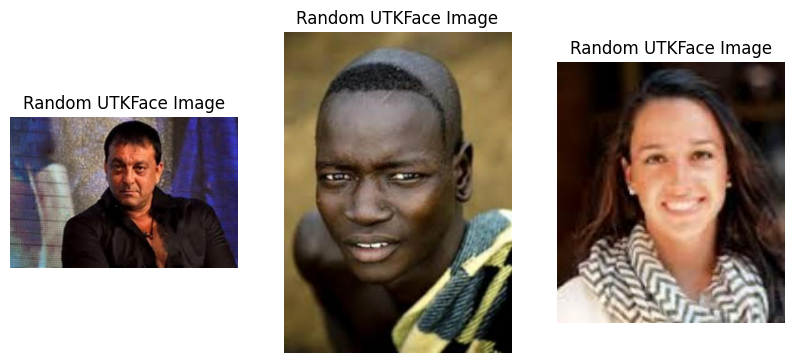

In [7]:
# import random

# # Display the random valid UTKFace image
# if len(utkface_images) > 1:
#     random_image_path = random.choice(utkface_images)
#     print(f"Displaying a random UTKFace image: {random_image_path}")

#     image = Image.open(random_image_path)
#     plt.imshow(image)
#     plt.axis("off") # Hide axis labels
#     plt.show()


import random
import matplotlib.pyplot as plt
from PIL import Image

# Number of random images to display
num_images = 3  # Change this value to display more or fewer images

# Check if there are enough images available
if len(utkface_images) > 0:
    random_images = random.sample(utkface_images, min(num_images, len(utkface_images)))

    # Display the selected images
    fig, axes = plt.subplots(1, len(random_images), figsize=(10, 5))

    if len(random_images) == 1:
        axes = [axes]  # Ensure axes is iterable when only one image is selected

    for ax, image_path in zip(axes, random_images):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis("off")  # Hide axis labels
        ax.set_title("Random UTKFace Image")

    plt.show()
else:
    print("No UTKFace images found.")


## PRE-PROCESSING





In [9]:
# from tensorflow.keras.layers import Rescaling
# import os

# # Set parameters
# IMG_SIZE = (64, 64)   # Resize all images
# BATCH_SIZE = 16       # Number of images in one batch
# SEED = 42

# # Define the dataset path
# dataset_dir = "/content/drive/MyDrive/UTKface_inthewild"

# # Create a dataset directly from directory (loads images on-the-fly)
# full_dataset = tf.keras.utils.image_dataset_from_directory(
#     dataset_dir,
#     label_mode=None,              # No labels (age will be extracted separately if needed)
#     image_size=IMG_SIZE,          # Resize images
#     batch_size=BATCH_SIZE,
#     shuffle=True,
#     seed=SEED                     # Ensure reproducibility
# )

# # Normalize pixel values to 0-1
# normalization_layer = Rescaling(1./255)
# full_dataset = full_dataset.map(lambda x: normalization_layer(x))

# # Shuffle and split the dataset (80% train, 20% val)
# dataset_size = full_dataset.cardinality().numpy()
# val_size = int(0.2 * dataset_size)

# val_dataset = full_dataset.take(val_size)
# train_dataset = full_dataset.skip(val_size)

# print(f"Preprocessing completed.")
# print(f"Training batches: {train_dataset.cardinality().numpy()}, Validation batches: {val_dataset.cardinality().numpy()}")


Found 24129 files.
✅ Preprocessing completed.
Training batches: 1208, Validation batches: 301


In [11]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split


# -----------------------------
# CONFIG
# -----------------------------
IMG_SIZE = (64, 64)   # Resize all images
BATCH_SIZE = 32       # Number of images in one batch
SEED = 42

# Path to UTKFace dataset folder
dataset_path = "/content/drive/MyDrive/UTKface_inthewild"

# -----------------------------
# LOAD IMAGE PATHS & AGE LABELS
# -----------------------------
image_paths = []
age_labels = []

for root, dirs, files in os.walk(dataset_path):
    for fname in files:
        if fname.endswith('.jpg'):
            try:
                age = int(fname.split("_")[0])  # Extract age from filename
                full_path = os.path.join(root, fname)
                image_paths.append(full_path)
                age_labels.append(age)
            except:
                continue  # Skip corrupted or improperly named files

print(f"Total images with valid labels: {len(image_paths)}")

# -----------------------------
# TRAIN-VALIDATION SPLIT
# -----------------------------
train_paths, val_paths, train_ages, val_ages = train_test_split(
    image_paths, age_labels, test_size=0.2, random_state=SEED)

# -----------------------------
# CREATE DATASET PIPELINE
# -----------------------------
def load_and_preprocess(path, label):
    image_str = tf.io.read_file(path)
    img = tf.image.decode_jpeg(image_str, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

train_ds = tf.data.Dataset.from_tensor_slices((train_paths, train_ages))
val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_ages))

train_ds = train_ds.map(load_and_preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(load_and_preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Total images with valid labels: 24129


In [12]:
# -----------------------------
# BUILD MODEL
# -----------------------------

# Build the model with ResNet50 base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Freeze base model

# Add custom regression head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Regression output
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss=MeanAbsoluteError(),
    metrics=['mae']
)

# -----------------------------
# TRAIN MODEL
# -----------------------------

# Add callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model_resnet_age.h5", save_best_only=True)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 19.2580 - mae: 19.2580

604/604 ━━━━━━━━━━━━━━━━━━━━ 1480s 2s/step - loss: 19.2537 - mae: 19.2537 - val_loss: 15.2243 - val_mae: 15.2243
Epoch 2/20
603/604 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 15.2980 - mae: 15.2980

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - loss: 15.2982 - mae: 15.2982 - val_loss: 15.1379 - val_mae: 15.1379
Epoch 3/20
598/604 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 15.1833 - mae: 15.1833

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - loss: 15.1841 - mae: 15.1841 - val_loss: 15.0701 - val_mae: 15.0701
Epoch 4/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 15.1150 - mae: 15.1150 - val_loss: 15.0712 - val_mae: 15.0712
Epoch 5/20
602/604 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 15.0600 - mae: 15.0600

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - loss: 15.0606 - mae: 15.0606 - val_loss: 15.0381 - val_mae: 15.0381
Epoch 6/20
598/604 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 15.0523 - mae: 15.0523

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - loss: 15.0534 - mae: 15.0534 - val_loss: 14.9961 - val_mae: 14.9961
Epoch 7/20
598/604 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 15.0154 - mae: 15.0154

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - loss: 15.0169 - mae: 15.0169 - val_loss: 14.9795 - val_mae: 14.9795
Epoch 8/20
603/604 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 15.0216 - mae: 15.0216

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - loss: 15.0220 - mae: 15.0220 - val_loss: 14.9655 - val_mae: 14.9655
Epoch 9/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.9559 - mae: 14.9559

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - loss: 14.9561 - mae: 14.9561 - val_loss: 14.9575 - val_mae: 14.9575
Epoch 10/20
599/604 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.9648 - mae: 14.9648

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - loss: 14.9662 - mae: 14.9662 - val_loss: 14.9357 - val_mae: 14.9357
Epoch 11/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 14.9775 - mae: 14.9775 - val_loss: 14.9708 - val_mae: 14.9708
Epoch 12/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 14.9347 - mae: 14.9347 - val_loss: 14.9484 - val_mae: 14.9484
Epoch 13/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 14.9964 - mae: 14.9964 - val_loss: 15.0264 - val_mae: 15.0264
Epoch 14/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 15.0365 - mae: 15.0365 - val_loss: 15.0065 - val_mae: 15.0065
Epoch 15/20
598/604 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 14.9592 - mae: 14.9592

604/604 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - loss: 14.9601 - mae: 14.9601 - val_loss: 14.8894 - val_mae: 14.8894
Epoch 16/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 15.0346 - mae: 15.0346 - val_loss: 15.0528 - val_mae: 15.0528
Epoch 17/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 14.8976 - mae: 14.8976 - val_loss: 15.0620 - val_mae: 15.0620
Epoch 18/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 14.8585 - mae: 14.8585 - val_loss: 14.9440 - val_mae: 14.9440
Epoch 19/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 72ms/step - loss: 14.9091 - mae: 14.9091 - val_loss: 15.0699 - val_mae: 15.0699
Epoch 20/20
604/604 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - loss: 14.9475 - mae: 14.9475 - val_loss: 14.9309 - val_mae: 14.9309
